<a href="https://colab.research.google.com/github/Pakhi27/Speech-Emmotion-Recognition/blob/main/Speech_Emmotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [4]:

paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        # getting the last partafter underscore-fear.wav
        label = filename.split('_')[-1]
        # getting the word fear
        label = label.split('.')[0]
        # out of capital and small choose small fear
        labels.append(label.lower())
    if len(paths) == 2800:
         break
print('Dataset is Loaded')


Dataset is Loaded


In [5]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_fall_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_fat_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_fail_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_doll_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_far_angry.wav']

In [6]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [7]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()


,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,angry
1,/content/drive/MyDrive/TESS Toronto emotional ...,angry
2,/content/drive/MyDrive/TESS Toronto emotional ...,angry
3,/content/drive/MyDrive/TESS Toronto emotional ...,angry
4,/content/drive/MyDrive/TESS Toronto emotional ...,angry


In [8]:
df['label'].value_counts()

,count
label,
angry,400
disgust,400
fear,400
happy,400
neutral,400
ps,400
sad,400


Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

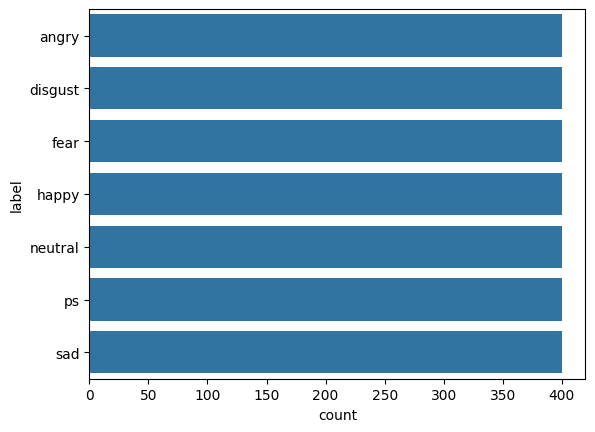

In [9]:
sns.countplot(df['label'])

Functions for Waveplot and Spectogram

In [15]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()


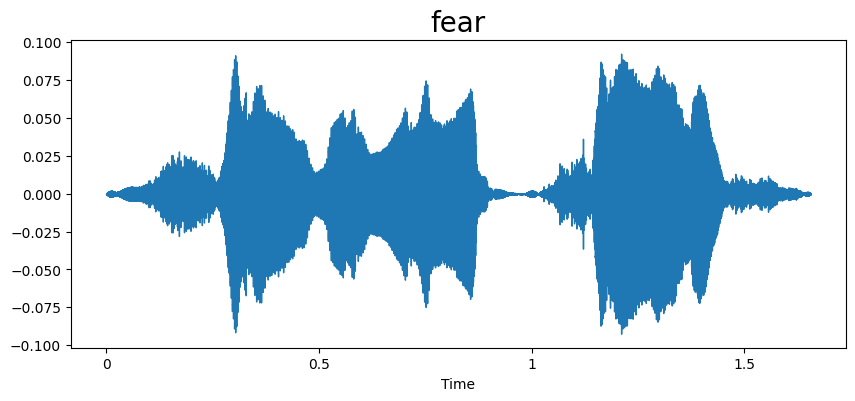

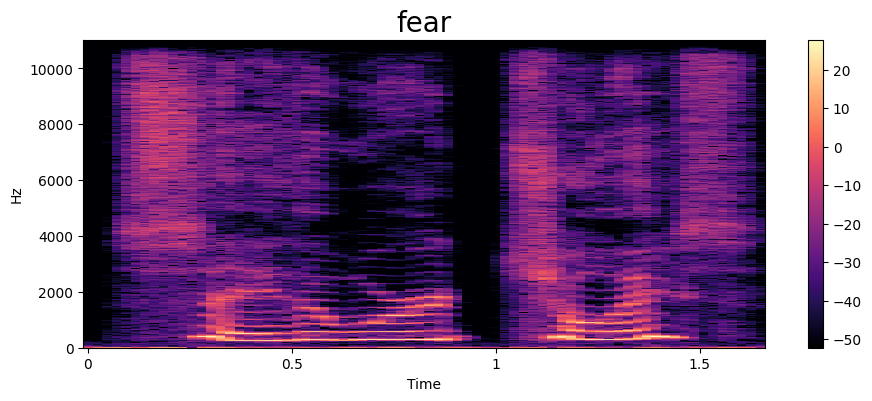

In [18]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

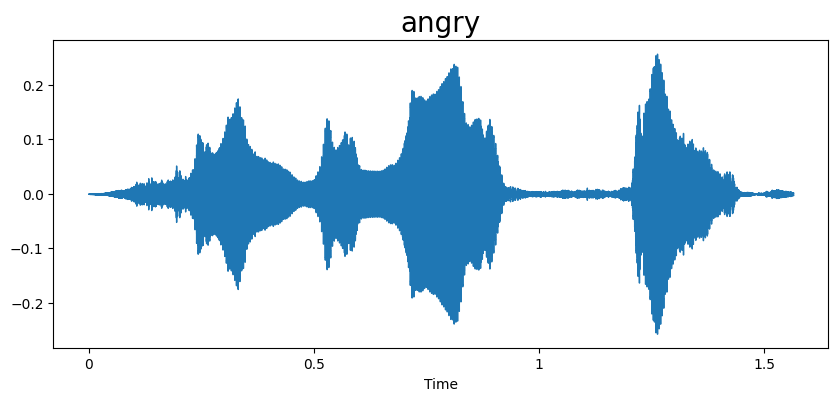

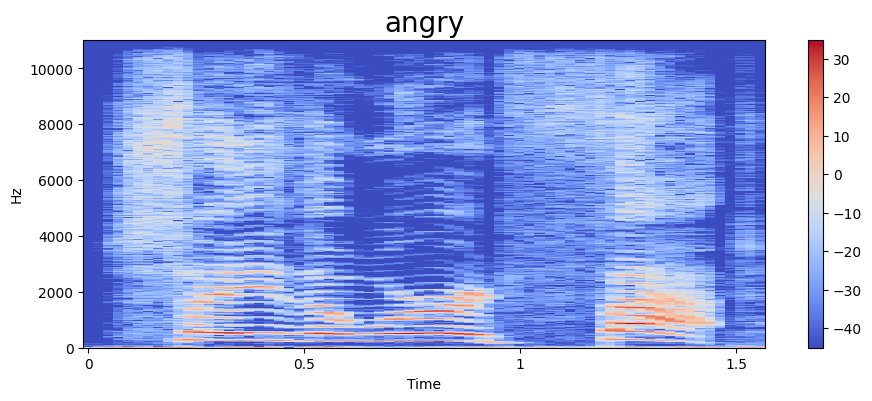

In [20]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

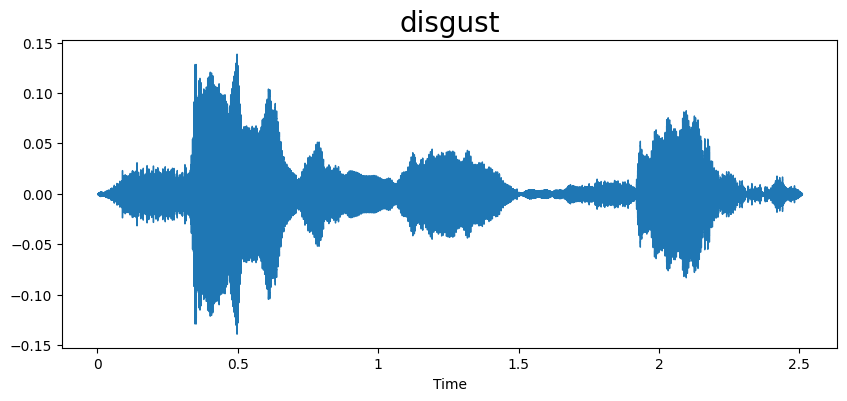

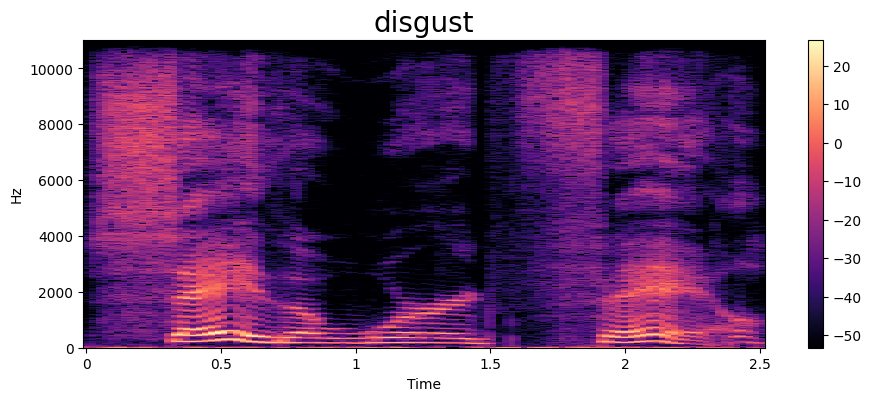

In [21]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

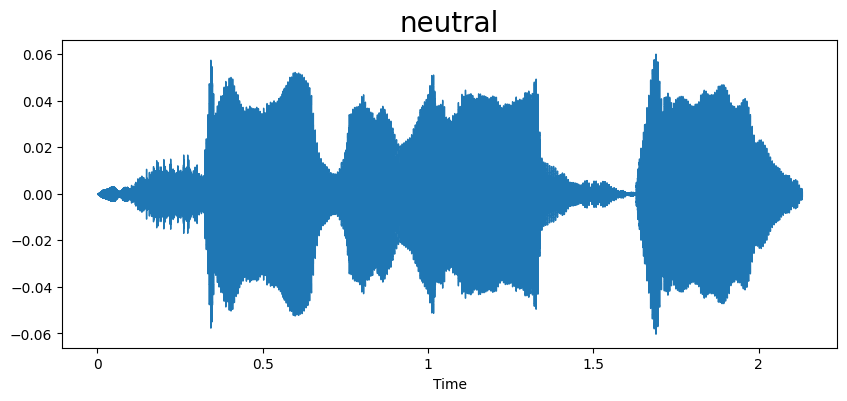

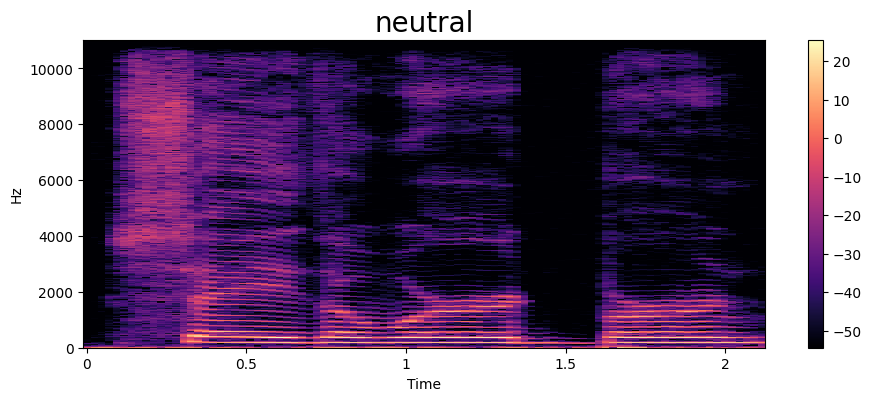

In [22]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

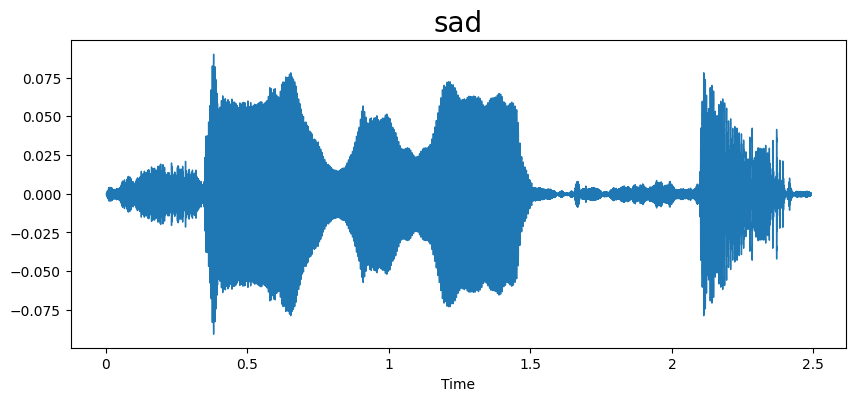

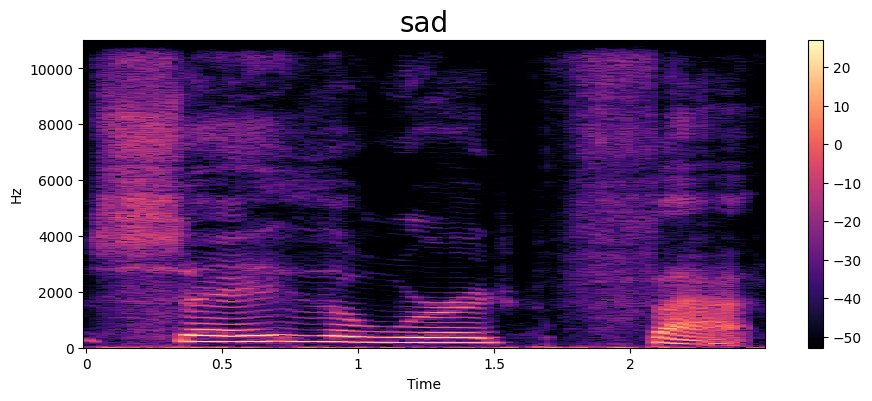

In [23]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

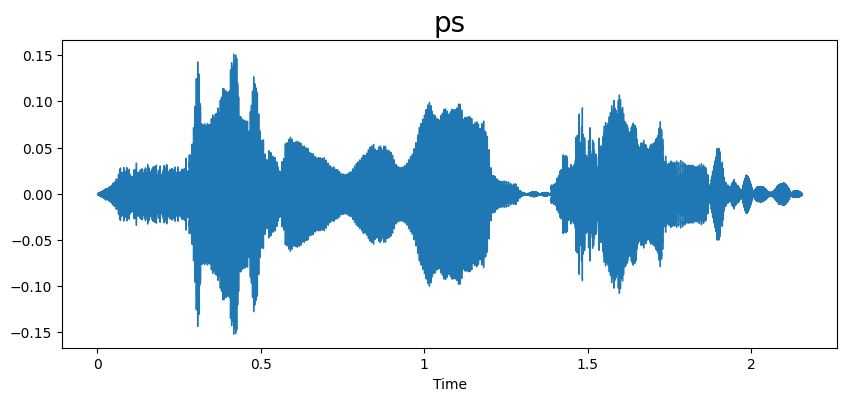

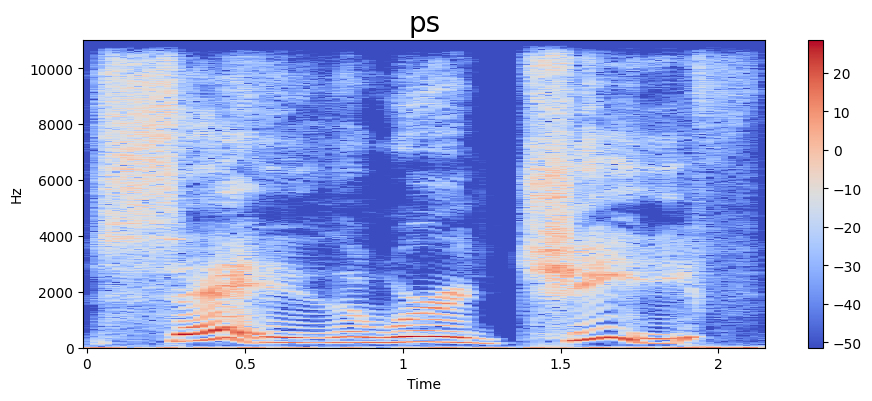

In [24]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

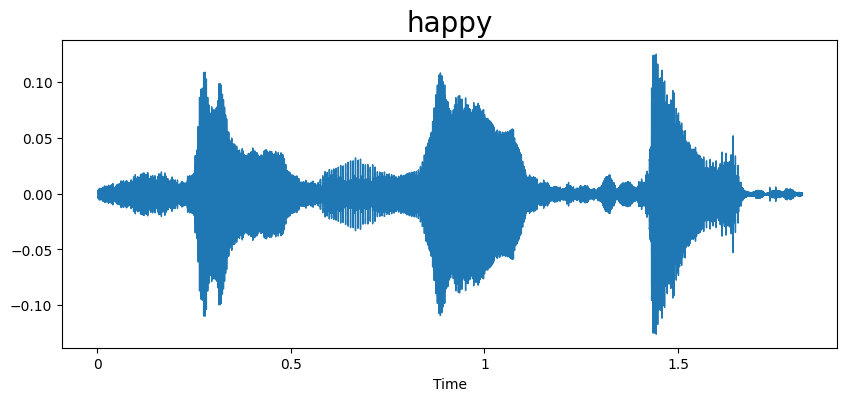

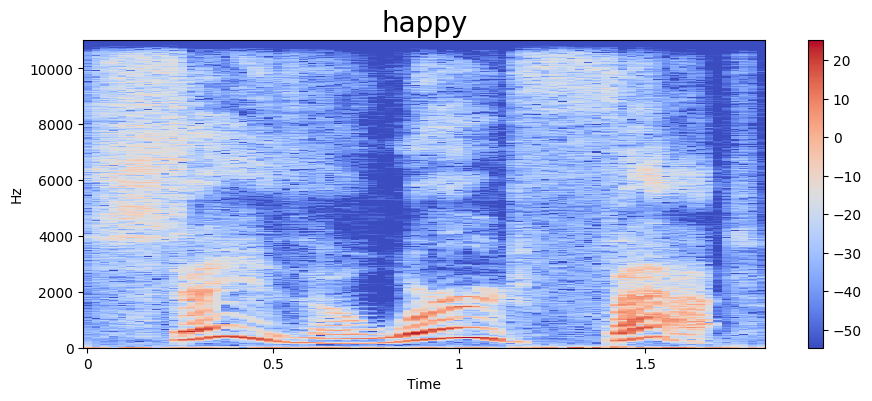

In [25]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

Feature Extraction

Mel Frequency cepstral coefficent(mfcc)

In [26]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

Mel-Frequency Cepstral Coefficients (MFCCs) are a way to turn sound into numbers that summarize the key features of the sound, especially the parts important for human hearing. They are commonly used in tasks like speech recognition or emotion detection from speech because they capture important details while ignoring unnecessary noise. Essentially, MFCCs help computers understand and process audio by breaking it down into useful, easy-to-handle pieces.

In [27]:
extract_mfcc(df['speech'][0])

array([-3.9738898e+02,  8.1563988e+01,  7.6691298e+00, -2.1538919e+01,
       -3.0161983e+01, -6.0174785e+00, -9.4701738e+00,  2.7417231e+00,
       -1.0981468e+01,  2.5331604e+00, -1.1079694e+01,  1.7575337e+00,
       -8.8992434e+00,  5.4948077e+00, -9.0724117e-01,  2.7237302e-01,
       -1.7209313e+00, -3.1861255e+00, -3.2942352e+00, -1.3143308e+01,
       -4.9196119e+00,  2.2667823e+00, -3.6205750e+00,  1.2341154e+01,
        1.7110647e+01,  2.5311357e+01,  1.8101334e+01,  2.0709888e+01,
        2.9218650e+00,  4.5100393e+00,  3.8270512e+00,  5.0410514e+00,
        9.5557947e+00, -5.5256253e-01,  4.8517356e+00,  2.6868839e+00,
        2.3997822e+00,  8.7992067e+00,  6.8025625e-01,  1.7328389e+00],
      dtype=float32)

In [28]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
# Returns extracted features from all the audio files

In [29]:
X_mfcc

,speech
0,"[-397.38898, 81.56399, 7.66913, -21.53892, -30..."
1,"[-394.4977, 61.888035, -15.578807, -35.14207, ..."
2,"[-392.97095, 52.796944, -1.6024941, -19.41383,..."
3,"[-418.37006, 85.24959, 7.4627376, -10.104419, ..."
4,"[-399.37137, 79.27316, -12.59815, -47.466835, ..."
...,...
2795,"[-538.658, 101.62637, 27.200432, 15.198143, 23..."
2796,"[-552.7234, 104.614395, 41.67392, 12.969337, 2..."
2797,"[-517.37305, 110.70556, 25.860277, 12.877128, ..."
2798,"[-526.0847, 112.26481, 32.037457, 6.9437075, 1..."


In [30]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
# Conversion of the list into a single dimensional array


In [31]:
X=np.expand_dims(X, -1)
X.shape


(2800, 40, 1)

In [ ]:
# The shape represents the number of samples in the dataset and features in a single dimension array


In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [33]:
y=y.toarray()

In [34]:
y.shape

(2800, 7)

Create the LSTM Model

In [35]:
import tensorflow as tf


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


model = Sequential([
    # 1st layer
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    # 2nd layer -138 neurons
    Dense(128, activation='relu'),
    Dropout(0.2),
    # 3rd layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    #  final outpit layer-softmax activation
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.4841 - loss: 1.4496 - val_accuracy: 0.6554 - val_loss: 0.8311
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.8260 - loss: 0.4723 - val_accuracy: 0.9643 - val_loss: 0.1452
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.9431 - loss: 0.1850 - val_accuracy: 0.9375 - val_loss: 0.1716
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9523 - loss: 0.1547 - val_accuracy: 0.9054 - val_loss: 0.3133
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.9589 - loss: 0.1284 - val_accuracy: 0.9607 - val_loss: 0.0945
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.9739 - loss: 0.0824 - val_accuracy: 0.9446 - val_loss: 0.1583
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.9600 - loss: 0.1247 - val_accuracy: 0.9768 - val_loss: 0.0640
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9756 - loss: 0.0733 - val_accurac

Plot the results

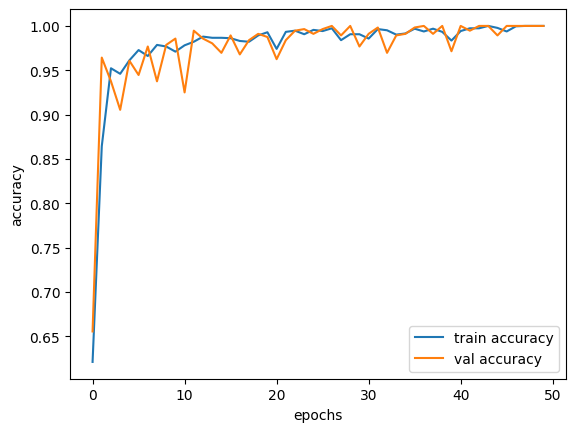

In [38]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

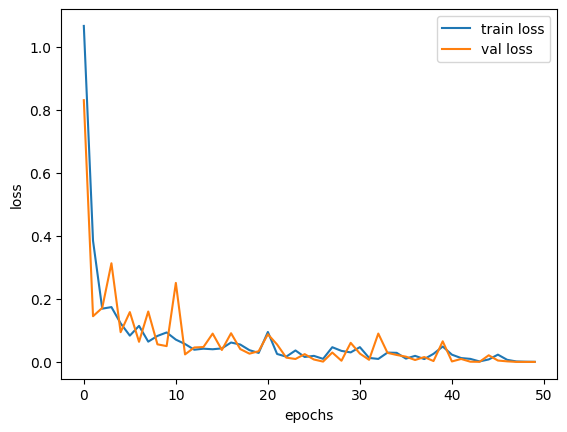

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Spectral Centroid and Bandwidth

In [40]:
import numpy as np
import librosa

def extract_spectral_features(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)

    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr).T, axis=0)

    return spectral_centroid, spectral_bandwidth


In [41]:
X_SC_BW = df['speech'].apply(lambda x: extract_spectral_features(x))

In [42]:
X_SC_BW

,speech
0,"([2204.627318845426], [2139.887407652804])"
1,"([2685.6268777655796], [2297.6366536166947])"
2,"([2559.484292983687], [2609.092867948984])"
3,"([1358.3742499729253], [1890.3921060292216])"
4,"([2209.010047144372], [2300.576337471863])"
...,...
2795,"([1303.8340132003623], [1965.876116686834])"
2796,"([1256.852105716602], [2152.6905649958635])"
2797,"([1231.1845468490576], [1990.1177641705845])"
2798,"([1114.0610113915593], [1887.527460540673])"


In [65]:
import numpy as np



# Extract each feature from the tuples
spectral_centroids = [x[0][0] for x in X_SC_BW]  # Extracting the single value from the list
spectral_bandwidths = [x[1][0] for x in X_SC_BW]  # Extracting the single value from the list

# Combine all features into a single NumPy array
X = np.array(list(zip(spectral_centroids, spectral_bandwidths)))

# Check the shape of the resulting array
print(X.shape)


(2800, 2)


In [66]:
X=np.expand_dims(X, -1)
X.shape


(2800, 2, 1)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


model = Sequential([
    # 1st layer
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    # 2nd layer -138 neurons
    Dense(128, activation='relu'),
    Dropout(0.2),
    # 3rd layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    #  final outpit layer-softmax activation
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1897 - loss: 1.9096 - val_accuracy: 0.0000e+00 - val_loss: 2.2608
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1783 - loss: 1.9084 - val_accuracy: 0.0000e+00 - val_loss: 2.2383
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1776 - loss: 1.9092 - val_accuracy: 0.0000e+00 - val_loss: 2.2981
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1760 - loss: 1.9052 - val_accuracy: 0.0000e+00 - val_loss: 2.2415
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1845 - loss: 1.9080 - val_accuracy: 0.0000e+00 - val_loss: 2.3218
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1774 - loss: 1.9038 - val_accuracy: 0.0000e+00 - val_loss: 2.2954
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1704 - loss: 1.9123 - val_accuracy: 0.0000e+00 - val_loss: 2.3195
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1674 - loss: 1.895

Plot the Results

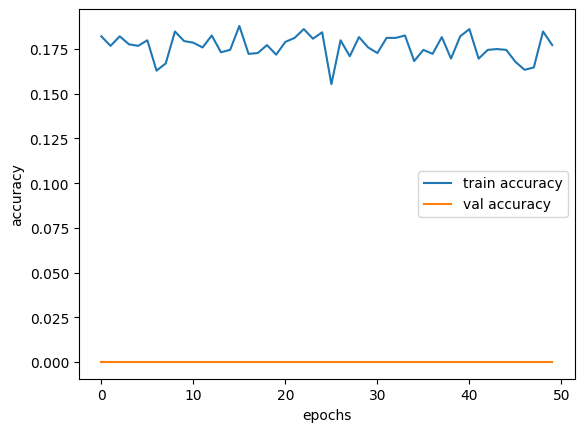

In [71]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

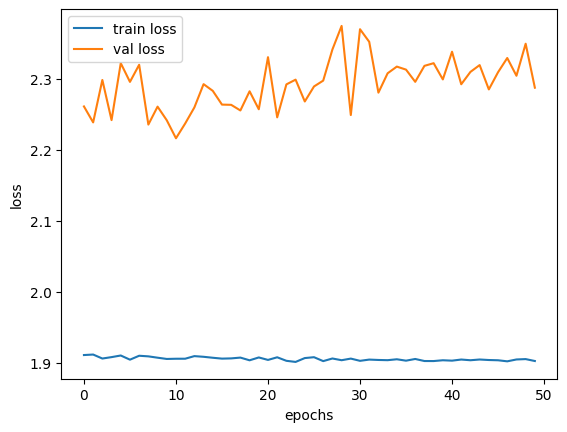

In [72]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

Time Domain Featues

In [49]:
import numpy as np
import librosa

def extract_time_domain_features(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)

    # Amplitude Envelope
    amplitude_envelope = np.mean(np.abs(y))

    # Root Mean Square Energy (RMSE)
    rmse = np.mean(librosa.feature.rms(y=y).T, axis=0)

    # Zero Crossing Rate (ZCR)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)

    return amplitude_envelope, rmse, zcr


In [52]:
X_time_domain = df['speech'].apply(lambda x: extract_time_domain_features(x))

In [53]:
X_time_domain

,speech
0,"(0.027415626, [0.034750503], [0.1099609375])"
1,"(0.02934529, [0.037941102], [0.156727666440217..."
2,"(0.022814926, [0.029251326], [0.091064453125])"
3,"(0.03213729, [0.04013325], [0.04636678890306122])"
4,"(0.026944764, [0.034584645], [0.10090775923295..."
...,...
2795,"(0.011029235, [0.013405005], [0.04200922056686..."
2796,"(0.008792717, [0.010469321], [0.03089151503164..."
2797,"(0.010485376, [0.0124531975], [0.0350650326236..."
2798,"(0.012086319, [0.014378692], [0.03409830729166..."


In [57]:
# Assuming X_time_domain is a list of tuples like (amplitude_envelope, rmse, zcr)
import numpy as np

# Extract each feature from the tuples
amplitude_envelopes = [x[0] for x in X_time_domain]
rmses = [x[1][0] for x in X_time_domain]  # Extracting the single value from the list
zcrs = [x[2][0] for x in X_time_domain]  # Extracting the single value from the list

# Combine all features into a single NumPy array
X = np.array(list(zip(amplitude_envelopes, rmses, zcrs)))

# Check the shape of the resulting array
print(X.shape)


(2800, 3)


In [58]:
X=np.expand_dims(X, -1)
X.shape


(2800, 3, 1)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


model = Sequential([
    # 1st layer
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    # 2nd layer -138 neurons
    Dense(128, activation='relu'),
    Dropout(0.2),
    # 3rd layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    #  final outpit layer-softmax activation
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3683 - loss: 1.4441 - val_accuracy: 0.3250 - val_loss: 1.5502
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4063 - loss: 1.3561 - val_accuracy: 0.3375 - val_loss: 1.4628
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3550 - loss: 1.4197 - val_accuracy: 0.2893 - val_loss: 1.5386
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4019 - loss: 1.3934 - val_accuracy: 0.2768 - val_loss: 1.6433
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3956 - loss: 1.3551 - val_accuracy: 0.2000 - val_loss: 1.6965
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4188 - loss: 1.3513 - val_accuracy: 0.1714 - val_loss: 1.7797
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4120 - loss: 1.3630 - val_accuracy: 0.2321 - val_loss: 1.7149
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3749 - loss: 1.3986 - val_accuracy: 0.3429 - v

  Plot the Results

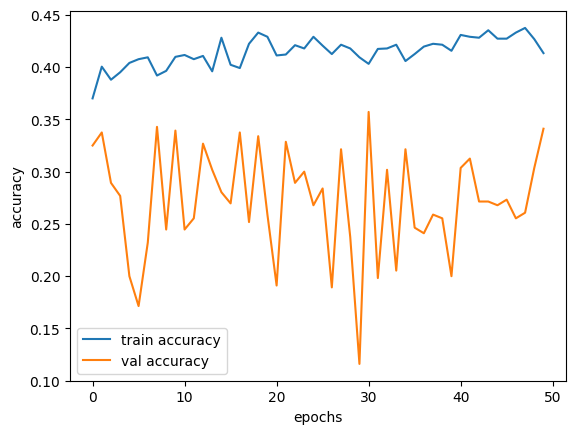

In [63]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

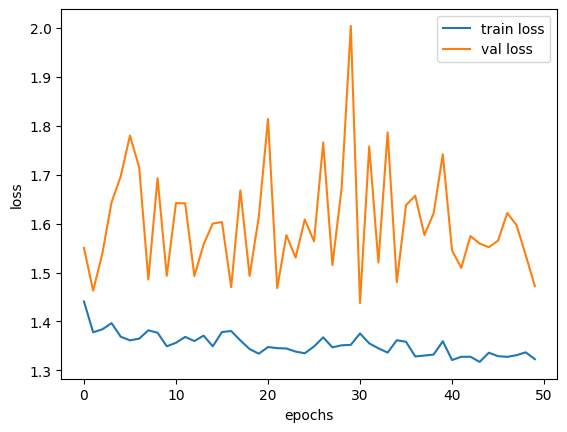

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()